## Observations and Insights

## Dependencies and starter code

In [132]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import statistics as stat

# Study data files
mouse_metadata = "./data/Mouse_metadata.csv"
study_results = "./data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset

## Summary statistics

In [133]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

In [134]:
#make a variable that groups mouse IDs by drug regimen

In [135]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [136]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [137]:
merged_data= pd.merge(mouse_metadata, study_results, on="Mouse ID")
merged_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [138]:
drugs= np.unique(mouse_metadata["Drug Regimen"])
drugs

array(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol',
       'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype=object)

In [139]:
Ceftamin =merged_data.loc[merged_data["Drug Regimen"]=="Ceftamin",:]
Infubinol =merged_data.loc[merged_data["Drug Regimen"]=="Infubinol",:]
Ketapril =merged_data.loc[merged_data["Drug Regimen"]=="Ketapril",:]
Naftisol =merged_data.loc[merged_data["Drug Regimen"]=="Naftisol",:]
Placebo =merged_data.loc[merged_data["Drug Regimen"]=="Placebo",:]
Propriva =merged_data.loc[merged_data["Drug Regimen"]=="Propriva",:]
Ramicane =merged_data.loc[merged_data["Drug Regimen"]=="Ramicane",:]
Stelasyn =merged_data.loc[merged_data["Drug Regimen"]=="Stelasyn",:]
Zoniferol =merged_data.loc[merged_data["Drug Regimen"]=="Zoniferol",:]
Capomulin =merged_data.loc[merged_data["Drug Regimen"]=="Capomulin",:]

In [140]:
count_drug_reg = np.zeros(len(drugs))
for i in range(0,len(drugs)):
    count_drug_reg[i]=np.shape(merged_data.loc[merged_data["Drug Regimen"]==drugs[i]])[0]
count_drug_reg

array([230., 178., 178., 188., 186., 181., 161., 228., 181., 182.])

In [141]:
Ceftamin_tv =Ceftamin["Tumor Volume (mm3)"]


In [142]:
Infubinol_tv = Infubinol["Tumor Volume (mm3)"]

In [143]:
Ketapril_tv =Ketapril["Tumor Volume (mm3)"]


In [144]:
Naftisol_tv=Naftisol["Tumor Volume (mm3)"]

In [145]:
Placebo_tv=Placebo["Tumor Volume (mm3)"]

In [146]:
Propriva_tv=Propriva["Tumor Volume (mm3)"]

In [147]:
Ramicane_tv=Ramicane["Tumor Volume (mm3)"]

In [148]:
Stelasyn_tv=Stelasyn["Tumor Volume (mm3)"]

In [149]:
Zoniferol_tv=Zoniferol["Tumor Volume (mm3)"]

In [150]:
from scipy.stats import sem

In [151]:
Capomulin_tv=Capomulin["Tumor Volume (mm3)"]

In [152]:
drug_stats=pd.DataFrame({"Drug Regimen":[i for i in drugs],
                         "Mean":[Capomulin_tv.mean(),Ceftamin_tv.mean(), Infubinol_tv.mean(), Ketapril_tv.mean(), Naftisol_tv.mean(), Placebo_tv.mean(), Propriva_tv.mean(), Ramicane_tv.mean(), Stelasyn_tv.mean(), Zoniferol_tv.mean()],
                         "Median":[Capomulin_tv.median(),Ceftamin_tv.median(), Infubinol_tv.median(), Ketapril_tv.median(), Naftisol_tv.median(), Placebo_tv.median(), Propriva_tv.median(), Ramicane_tv.median(), Stelasyn_tv.median(), Zoniferol_tv.median()],
                         "Variance":[np.var(Capomulin_tv), np.var(Ceftamin_tv), np.var(Infubinol_tv), np.var(Ketapril_tv), np.var(Naftisol_tv), np.var(Placebo_tv), np.var(Propriva_tv), np.var(Ramicane_tv), np.var(Stelasyn_tv), np.var(Zoniferol_tv)],
                         "Standard Deviation":[np.std(Capomulin_tv),np.std(Ceftamin_tv),np.std(Infubinol_tv),np.std(Ketapril_tv),np.std(Naftisol_tv),np.std(Placebo_tv),np.std(Propriva_tv),np.std(Ramicane_tv),np.std(Stelasyn_tv), np.std(Zoniferol_tv)],
                         "SEM":[sem([Capomulin_tv], axis=1),sem([Ceftamin_tv], axis=1),sem([Infubinol_tv], axis=1),sem([Ketapril_tv], axis=1),sem([Naftisol_tv],axis=1),sem([Placebo_tv], axis=1),sem([Propriva_tv], axis=1),sem([Ramicane_tv], axis=1),sem([Stelasyn_tv], axis=1),sem([Zoniferol_tv], axis=1)]
                        
                        })


In [153]:
drug_stats

,Drug Regimen,Mean,Median,Variance,Standard Deviation,SEM
0,Capomulin,40.675741,41.557809,24.839296,4.983904,[0.32934562340083096]
1,Ceftamin,52.591172,51.776157,39.069446,6.250556,[0.46982053275261093]
2,Infubinol,52.884795,51.820584,42.886388,6.548770,[0.4922356938011383]
3,Ketapril,55.235638,53.698743,68.188930,8.257659,[0.6038598237739697]
4,Naftisol,54.331565,52.509285,65.817708,8.112811,[0.5964657512424235]
5,Placebo,54.033581,52.288934,60.830138,7.799368,[0.5813305510593876]
6,Propriva,52.322552,50.854632,42.088020,6.487528,[0.5128841213647222]
7,Ramicane,40.216745,40.673236,23.383692,4.835669,[0.3209546065084816]
8,Stelasyn,54.233149,52.431737,59.122106,7.689090,[0.5731109332771458]
9,Zoniferol,53.236507,51.818479,48.266689,6.947423,[0.5163978968332169]


## Bar plots

In [154]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

In [155]:
df1 = pd.DataFrame({'Drug Name':[j for j in list(drugs)], '# Data Points':[k for k in count_drug_reg]},index=list(drugs))

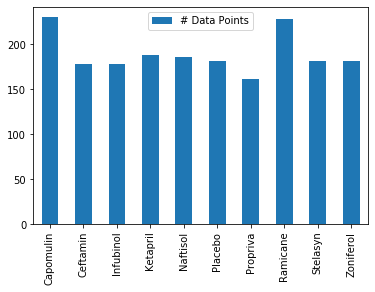

In [156]:
df1.plot.bar()

In [157]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

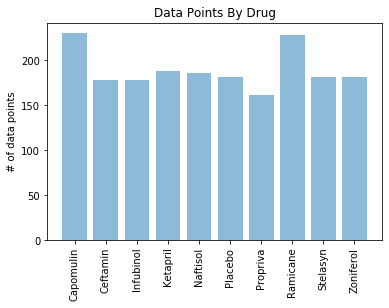

In [158]:
objects = ("Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol")
y_pos = (230, 178, 178, 188, 186, 181, 161, 228, 181, 182)
performance = [250,200,150,100,50,0]

plt.bar(objects, y_pos, align='center', alpha=0.5)
plt.ylabel('# of data points')
plt.xticks(rotation=90)
plt.title('Data Points By Drug')

plt.show()

## Pie plots

In [159]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

In [160]:
fml=merged_data.loc[merged_data["Sex"]=="Female",:]
ml=merged_data.loc[merged_data["Sex"]=="Male",:]

In [161]:
df2=pd.DataFrame({"Distribution":[len(ml),len(fml)]},
index=["Male","Female"])

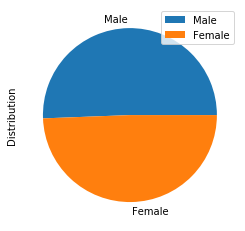

In [162]:
plot=df2.plot.pie(y="Distribution")

In [163]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

In [164]:
len(ml)

958

In [165]:
len(fml)

935

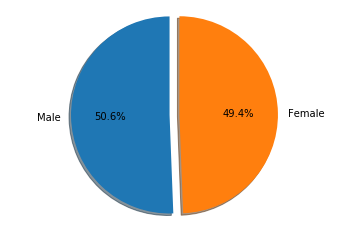

In [166]:
labels = 'Male', 'Female'
sizes = [958, 935]
explode = (0, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## Quartiles, outliers and boxplots

In [167]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 

In [168]:
max_tumor=merged_data.groupby(["Mouse ID"]).max().reset_index()
max_tumor

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z578,Ramicane,Male,11,16,45,45.000000,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [169]:
new_data=max_tumor[["Mouse ID","Timepoint"]].merge(merged_data, on=["Mouse ID","Timepoint"],how="left")

In [170]:
new_data

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [171]:
Capomulin2=new_data.loc[new_data["Drug Regimen"]=="Capomulin"]["Tumor Volume (mm3)"]
Ceftamin2=new_data.loc[new_data["Drug Regimen"]=="Ceftamin"]["Tumor Volume (mm3)"]
Infubinol2=new_data.loc[new_data["Drug Regimen"]=="Infubinol"]["Tumor Volume (mm3)"]
Ramicane2=new_data.loc[new_data["Drug Regimen"]=="Ramicane"]["Tumor Volume (mm3)"]

In [172]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [173]:
Capomulin_qrt=Capomulin2.quantile([.25,.5,.75])
Capomulin_qrt
Ceftamin_qrt=Ceftamin2.quantile([.25,.5,.75])
Infubinol_qrt=Infubinol2.quantile([.25,.5,.75])
Ramicane_qrt=Ramicane2.quantile([.25,.5,.75])

In [174]:
Capomulin_IQR=Capomulin_qrt[0.75]-Capomulin_qrt[.25]
Ceftamin_IQR=Ceftamin_qrt[.75]-Ceftamin_qrt[.25]
Infubinol_IQR=Infubinol_qrt[.75]-Infubinol_qrt[.25]
Ramicane_IQR=Ramicane_qrt[.75]-Ramicane_qrt[.25]

In [175]:
Capomulin_IQR

7.781863460000004

In [176]:
Capomulin_lb=Capomulin_qrt[.25]-(1.5*Capomulin_IQR)
Capmulin_ub=Capomulin_qrt[.75]+(1.5*Capomulin_IQR)
Ceftamin_lb=Ceftamin_qrt[.25]-(1.5*Ceftamin_IQR)
Ceftamin_ub=Ceftamin_qrt[.75]+(1.5*Ceftamin_IQR)
Infubinol_lb=Infubinol_qrt[.25]-(1.5*Infubinol_IQR)
Infubinol_ub=Infubinol_qrt[.75]+(1.5*Infubinol_IQR)
Ramicane_lb=Ramicane_qrt[.25]-(1.5*Ramicane_IQR)
Ramicane_ub=Ramicane_qrt[.75]+(1.5*Ramicane_IQR)

In [177]:
Outlier_cap=Capomulin2.loc[(Capomulin2<Capomulin_lb)|(Capomulin2>Capmulin_ub)]

In [178]:
Outlier_cap

Series([], Name: Tumor Volume (mm3), dtype: float64)

In [179]:
Outlier_ceft=Ceftamin2.loc[(Ceftamin2<Ceftamin_lb)|(Ceftamin2>Ceftamin_ub)]

In [180]:
Outlier_ceft

Series([], Name: Tumor Volume (mm3), dtype: float64)

In [181]:
Outlier_inf=Infubinol2.loc[(Infubinol2<Infubinol_lb)|(Infubinol2>Infubinol_ub)]

In [182]:
Outlier_inf #this is the outlier

31    36.321346
Name: Tumor Volume (mm3), dtype: float64

In [183]:
Outlier_ram=Ramicane2.loc[(Ramicane2<Ramicane_lb)|(Ramicane2>Ramicane_ub)]

In [184]:
Outlier_ram

Series([], Name: Tumor Volume (mm3), dtype: float64)

In [185]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

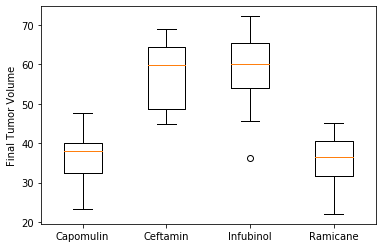

In [186]:
plt.boxplot([Capomulin2,Ceftamin2,Infubinol2,Ramicane2],labels=["Capomulin","Ceftamin","Infubinol","Ramicane"])
plt.ylabel("Final Tumor Volume")
plt.show()

## Line and scatter plots

In [187]:
Capomulin

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [188]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [189]:
Capomulin_s185=Capomulin.loc[Capomulin["Mouse ID"]=="s185",:]


In [190]:
Capomulin_s185

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


In [191]:
Capomulin_time_tv=Capomulin_s185.drop(columns=["Mouse ID","Drug Regimen","Sex","Age_months","Weight (g)", "Metastatic Sites"])

In [192]:
Capomulin_time_tv

,Timepoint,Tumor Volume (mm3)
10,0,45.000000
11,5,43.878496
12,10,37.614948
13,15,38.177232
14,20,36.866876
15,25,33.949940
16,30,32.959671
17,35,28.328531
18,40,25.472143
19,45,23.343598


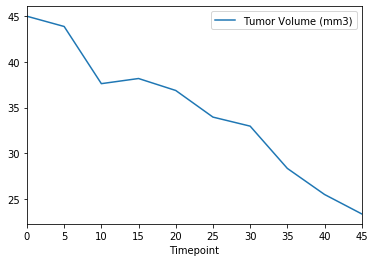

In [193]:
Capomulin_time_tv.plot.line(x="Timepoint",y="Tumor Volume (mm3)")

In [194]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [195]:
uniq_ID=np.unique(Capomulin["Mouse ID"])
av_tum_vol=np.zeros((len(uniq_ID),2))
ind = np.where(Capomulin["Mouse ID"]==uniq_ID[1])[0]
ind
volumes = np.array(Capomulin["Tumor Volume (mm3)"])[ind]
weights = np.array(Capomulin["Weight (g)"])[ind]
len(uniq_ID)

25

In [196]:
uniq_ID=np.unique(Capomulin["Mouse ID"])
av_tum_vol=np.zeros((len(uniq_ID),2))

for i in range(0,len(uniq_ID)):
    ind = np.where(Capomulin["Mouse ID"]==uniq_ID[i])[0]
    volumes = np.array(Capomulin["Tumor Volume (mm3)"])[ind]
    weights = np.array(Capomulin["Weight (g)"])[ind]
    av_tum_vol[i,0]=np.mean(weights)
    av_tum_vol[i,1]=np.mean(volumes)
    
    

In [197]:
av_tum_vol

array([[22.        , 41.96363563],
       [21.        , 40.0836993 ],
       [17.        , 36.50597276],
       [19.        , 41.99009661],
       [22.        , 44.6133439 ],
       [24.        , 44.80580968],
       [20.        , 39.14105275],
       [23.        , 44.46523635],
       [21.        , 43.21692461],
       [21.        , 44.43447379],
       [19.        , 42.50726103],
       [17.        , 34.8474699 ],
       [19.        , 39.04981645],
       [25.        , 45.79896951],
       [17.        , 36.50921205],
       [25.        , 43.36736445],
       [17.        , 34.55914339],
       [23.        , 42.80373304],
       [17.        , 39.3287251 ],
       [17.        , 39.88749519],
       [21.        , 41.5815951 ],
       [23.        , 41.38482521],
       [21.        , 41.35245228],
       [15.        , 36.18203956],
       [17.        , 38.50682925]])

In [198]:
scatter_df=pd.DataFrame({"Weight": [i for i in av_tum_vol[:,0]],
            "Avg Tumor Vol. (mm3)":[j for j in av_tum_vol[:,1]]
                                               })

In [199]:
scatter_df

,Weight,Avg Tumor Vol. (mm3)
0,22.0,41.963636
1,21.0,40.083699
2,17.0,36.505973
3,19.0,41.990097
4,22.0,44.613344
5,24.0,44.805810
6,20.0,39.141053
7,23.0,44.465236
8,21.0,43.216925
9,21.0,44.434474


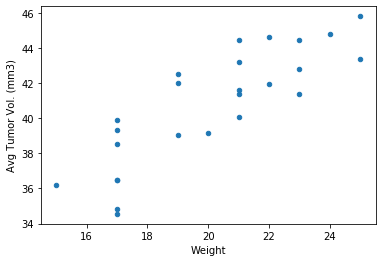

In [200]:
scatter_df.plot.scatter(x="Weight", y="Avg Tumor Vol. (mm3)")

In [201]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

In [202]:
from scipy.stats import linregress

linregress(av_tum_vol[:,0],av_tum_vol[:,1])



LinregressResult(slope=0.9544396890241051, intercept=21.552160532685008, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.12754359033201326)

In [203]:
from scipy.stats import pearsonr

In [204]:
corr,_=pearsonr(av_tum_vol[:,0], av_tum_vol[:,1])

In [205]:
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.842


In [206]:
av_tum_vol[:,0]


array([22., 21., 17., 19., 22., 24., 20., 23., 21., 21., 19., 17., 19.,
       25., 17., 25., 17., 23., 17., 17., 21., 23., 21., 15., 17.])

In [207]:
av_tum_vol[:,1]

array([41.96363563, 40.0836993 , 36.50597276, 41.99009661, 44.6133439 ,
       44.80580968, 39.14105275, 44.46523635, 43.21692461, 44.43447379,
       42.50726103, 34.8474699 , 39.04981645, 45.79896951, 36.50921205,
       43.36736445, 34.55914339, 42.80373304, 39.3287251 , 39.88749519,
       41.5815951 , 41.38482521, 41.35245228, 36.18203956, 38.50682925])

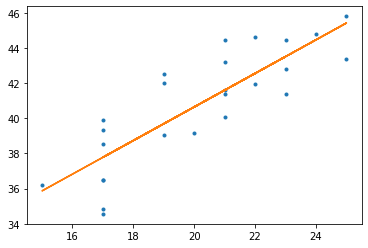

In [208]:
from numpy.polynomial.polynomial import polyfit

x = np.array([22, 21, 17, 19, 22, 24, 20, 23, 21, 21, 19, 17, 19,
       25, 17, 25, 17, 23, 17, 17, 21, 23, 21, 15, 17])
y = np.array([41.96363563, 40.0836993 , 36.50597276, 41.99009661, 44.6133439 ,
       44.80580968, 39.14105275, 44.46523635, 43.21692461, 44.43447379,
       42.50726103, 34.8474699 , 39.04981645, 45.79896951, 36.50921205,
       43.36736445, 34.55914339, 42.80373304, 39.3287251 , 39.88749519,
       41.5815951 , 41.38482521, 41.35245228, 36.18203956, 38.50682925])

# Fit with polyfit
b, m = polyfit(x, y, 1)


plt.plot(x, y, '.')
plt.plot(x, b + m * x, '-')
plt.show()